In [1]:
import json
import re

import numpy as np
import matplotlib.pyplot as plt
import tqdm
from matplotlib.colors import LogNorm
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import imageio.v3 as iio



texts_train = []
labels_train = []
texts_test = []
labels_test = []
print("Loading data")
with open('darkreddit_authorship_attribution_anon/darkreddit_authorship_attribution_train_anon.jsonl', 'r') as f:
    for line in f:
        line = json.loads(line)
        for key, value in line.items():
            if key == 'author':
                labels_train.append(value)
            elif key == 'comment':
                texts_train.append(value)
    f.close()
#     f.close()
with open('darkreddit_authorship_attribution_anon/darkreddit_authorship_attribution_test_anon.jsonl', 'r') as f:
    for line in f:
        line = json.loads(line)
        for key, value in line.items():
            if key == 'author':
                labels_test.append(value)
            elif key == 'comment':
                texts_test.append(value)
    f.close()
print("Loading finished")

# print(len(texts_train))
# print(len(labels_train))
# print(len(texts_test))
# print(len(labels_test))

X_train = []
X_test = []
Y_train = labels_train
Y_test = labels_test

for text in tqdm.tqdm(texts_train, desc="Processing train data "):
    text = re.sub(r'http\S+', 'URL', text)
    # text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[@$%^&*()]', '', text)
    text = re.sub(r'\s+', ' ', text)
    X_train.append(text)

for text in tqdm.tqdm(texts_test, desc="Processing test data "):
    text = re.sub(r'http\S+', 'URL', text)
    # text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[@$%^&*()]', '', text)
    text = re.sub(r'\s+', ' ', text)
    X_test.append(text)

Loading data
Loading finished


Processing test data : 100%|██████████| 2276/2276 [00:00<00:00, 31134.58it/s]


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


def cluster_text(text):
    vectorizer = TfidfVectorizer(stop_words={'english'})
    X = vectorizer.fit_transform(text)

    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return

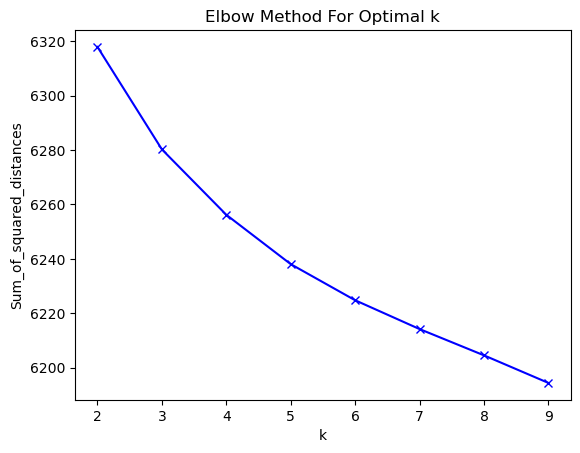

How many clusters do you want to use?
                                                  title  cluster
1180  That isn't something that we moderators would ...        0
1304  Your account is shadowbanned, which means that...        0
1398  Your account is shadowbanned, which means that...        0
1401  Your account is shadowbanned, which means that...        0
1409  Your account is shadowbanned, which means that...        0
1619  Your account is shadowbanned, which means that...        0
1700  Your account is shadowbanned, which means that...        0
1715  Your account is shadowbanned, which means that...        0
1781  Your account is shadowbanned, which means that...        0
1803  I told you this before, but your posts will no...        0
1915  You weren't getting replies to your post becau...        0
1933  Your account is shadowbanned, which means that...        0
3749  Your account is 2 months old and there is no n...        0
4240  Your account is shadowbanned my friend; any co

In [4]:
cluster_text(X_train)